In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('E:\CONTANT/Car_Models.csv')

In [3]:
df.head()

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders
0,Ferrari,812 Superfast,789 hp,530 lb-ft,7-speed automatic,RWD,13/20 mpg,2,"$366,712",2018 - Present,Coupe,6.5L V12,12
1,Ferrari,F8 Tributo,710 hp,568 lb-ft,7-speed automatic,RWD,15/19 mpg,2,"$276,550",2020 - Present,Coupe,3.9L V8,8
2,Ferrari,Roma,611 hp,560 lb-ft,8-speed automatic,RWD,16/24 mpg,2,"$218,750",2021 - Present,Coupe,3.9L V8,8
3,Ferrari,Portofino M,612 hp,561 lb-ft,8-speed automatic,RWD,16/22 mpg,2,"$254,475",2021 - Present,Convertible,3.9L V8,8
4,Ferrari,SF90 Stradale,986 hp,590 lb-ft,8-speed automatic,AWD,18 mpg (combined),2,"$625,000",2020 - Present,Coupe,4.0L V8,8


In [4]:
df.shape

(404, 13)

In [5]:
df.describe()

,Company,Model,Horsepower,Torque,Transmission Type,Drivetrain,Fuel Economy,Number of Doors,Price,Model Year Range,Body Type,Engine Type,Number of Cylinders
count,404,404,404,404,404,404,399,404,398,403,403,403,402
unique,62,374,232,205,68,22,250,22,323,125,31,94,23
top,Chevrolet,Zoe,148 hp,184 lb-ft,8-speed automatic,Front-wheel drive,9 mpg,5,"Starting at $32,990",2023-2024,SUV,4-cylinder,4
freq,20,2,12,19,81,79,10,121,5,85,135,93,163


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              404 non-null    object
 1   Model                404 non-null    object
 2   Horsepower           404 non-null    object
 3   Torque               404 non-null    object
 4   Transmission Type    404 non-null    object
 5   Drivetrain           404 non-null    object
 6   Fuel Economy         399 non-null    object
 7   Number of Doors      404 non-null    object
 8   Price                398 non-null    object
 9   Model Year Range     403 non-null    object
 10  Body Type            403 non-null    object
 11  Engine Type          403 non-null    object
 12  Number of Cylinders  402 non-null    object
dtypes: object(13)
memory usage: 41.2+ KB


In [7]:
df.dtypes

Company                object
Model                  object
Horsepower             object
Torque                 object
Transmission Type      object
Drivetrain             object
Fuel Economy           object
Number of Doors        object
Price                  object
Model Year Range       object
Body Type              object
Engine Type            object
Number of Cylinders    object
dtype: object

In [8]:
df.isnull().sum()

Company                0
Model                  0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Fuel Economy           5
Number of Doors        0
Price                  6
Model Year Range       1
Body Type              1
Engine Type            1
Number of Cylinders    2
dtype: int64

In [9]:
df.dropna(subset=['Fuel Economy'], inplace=True)
df.dropna(subset=['Price'], inplace=True)
df.dropna(subset=['Model Year Range'], inplace=True)
df.dropna(subset=['Body Type'], inplace=True)
df.dropna(subset=['Number of Cylinders'], inplace=True)

In [10]:
df.isnull().sum()

Company                0
Model                  0
Horsepower             0
Torque                 0
Transmission Type      0
Drivetrain             0
Fuel Economy           0
Number of Doors        0
Price                  0
Model Year Range       0
Body Type              0
Engine Type            0
Number of Cylinders    0
dtype: int64

In [11]:
def extract_numeric_value(text):
    try:
        numeric_value = float(''.join(filter(str.isdigit, str(text))))
        return numeric_value
    except ValueError:
        return None

df['Company'] = df['Company'].astype(str)
df['Model'] = df['Model'].astype(str)
df['Transmission Type'] = df['Transmission Type'].astype(str)
df['Drivetrain'] = df['Drivetrain'].astype(str)
df['Body Type'] = df['Body Type'].astype(str)

df['Horsepower'] = df['Horsepower'].apply(extract_numeric_value).astype(float)
df['Torque'] = df['Torque'].apply(extract_numeric_value).astype(float)
df['Fuel Economy'] = df['Fuel Economy'].apply(extract_numeric_value).astype(float)
df['Number of Doors'] = df['Number of Doors'].apply(extract_numeric_value).astype(float)
df['Price'] = df['Price'].apply(extract_numeric_value).astype(float)
df['Model Year Range'] = df['Model Year Range'].apply(extract_numeric_value).astype(float)
df['Engine Type'] = df['Engine Type'].apply(extract_numeric_value).astype(float)
df['Number of Cylinders'] = df['Number of Cylinders'].apply(extract_numeric_value).astype(float)

print(df.dtypes)

Company                 object
Model                   object
Horsepower             float64
Torque                 float64
Transmission Type       object
Drivetrain              object
Fuel Economy           float64
Number of Doors        float64
Price                  float64
Model Year Range       float64
Body Type               object
Engine Type            float64
Number of Cylinders    float64
dtype: object


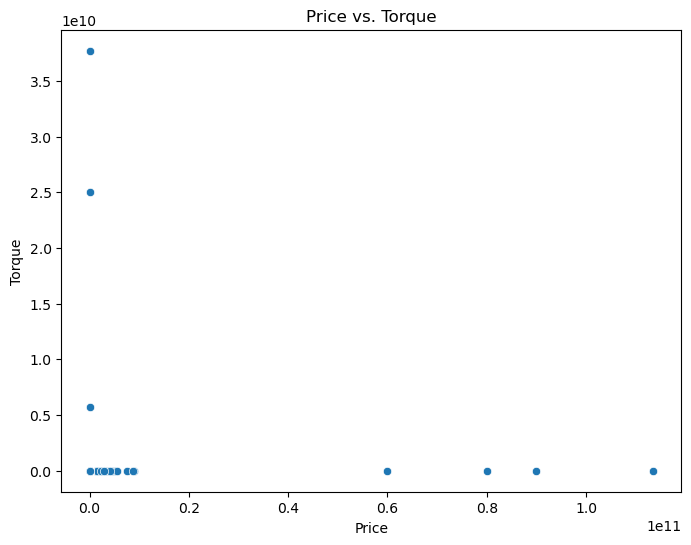

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Torque', data=df)
plt.title('Price vs. Torque')
plt.show()

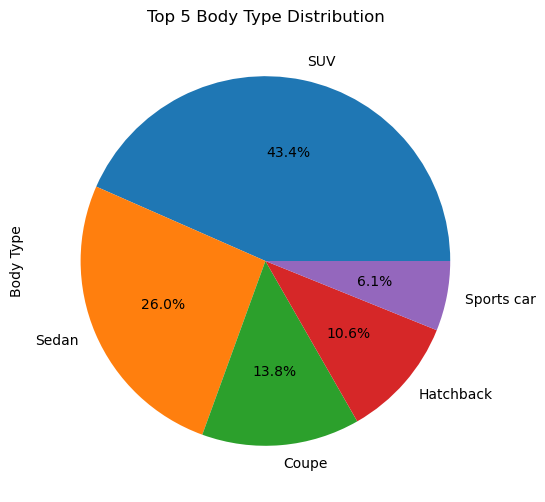

In [13]:
plt.figure(figsize=(8, 6))
top_body_types = df['Body Type'].value_counts().nlargest(5)
top_body_types.plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Body Type Distribution')
plt.show()

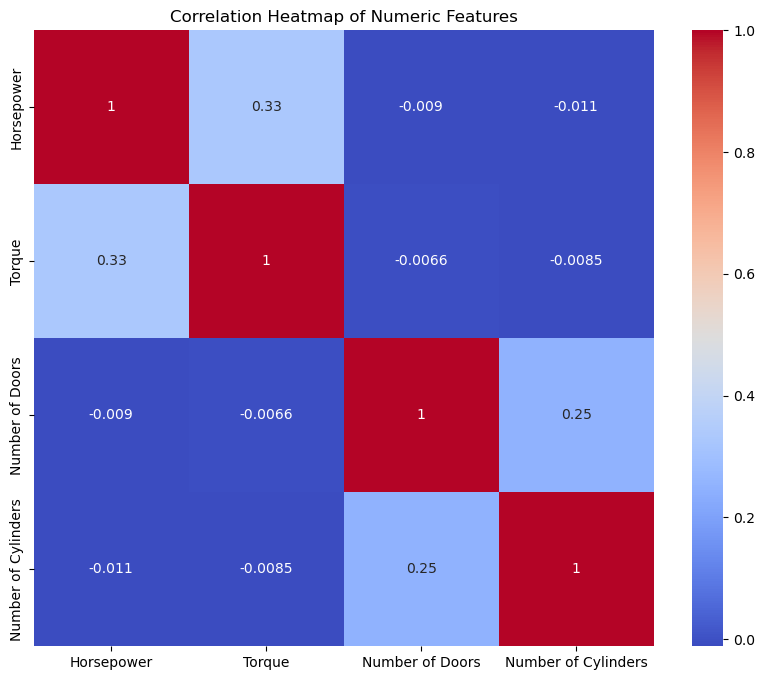

In [14]:
numeric_features = ['Horsepower', 'Torque', 'Number of Doors', 'Number of Cylinders']
numeric_data = df[numeric_features]
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

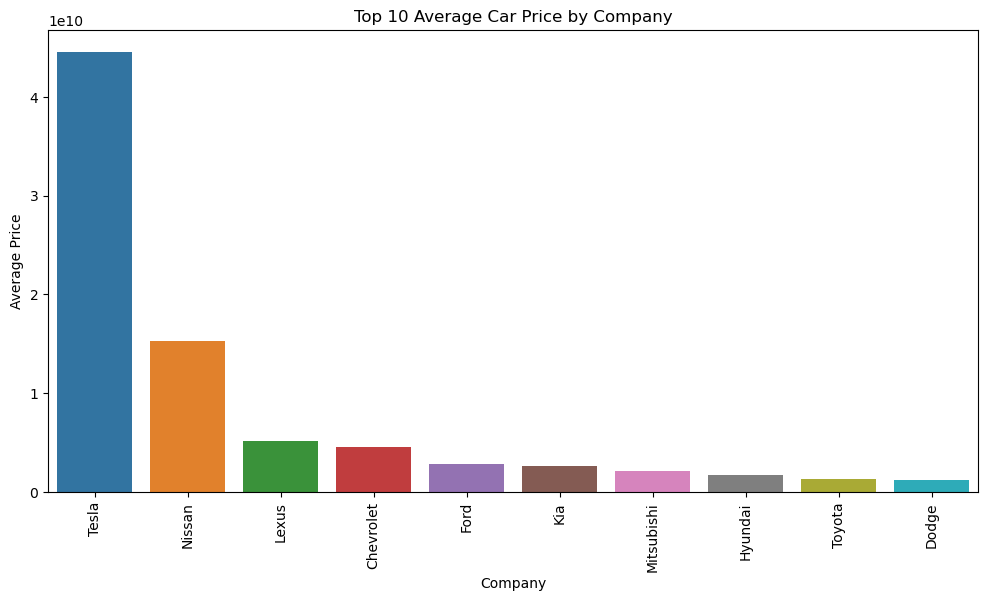

In [15]:
plt.figure(figsize=(12, 6))
top_10_avg_price_by_company = df.groupby('Company')['Price'].mean().nlargest(10).sort_values(ascending=False)
sns.barplot(x=top_10_avg_price_by_company.index, y=top_10_avg_price_by_company.values)
plt.title('Top 10 Average Car Price by Company')
plt.xlabel('Company')
plt.ylabel('Average Price')
plt.xticks(rotation=90)
plt.show()

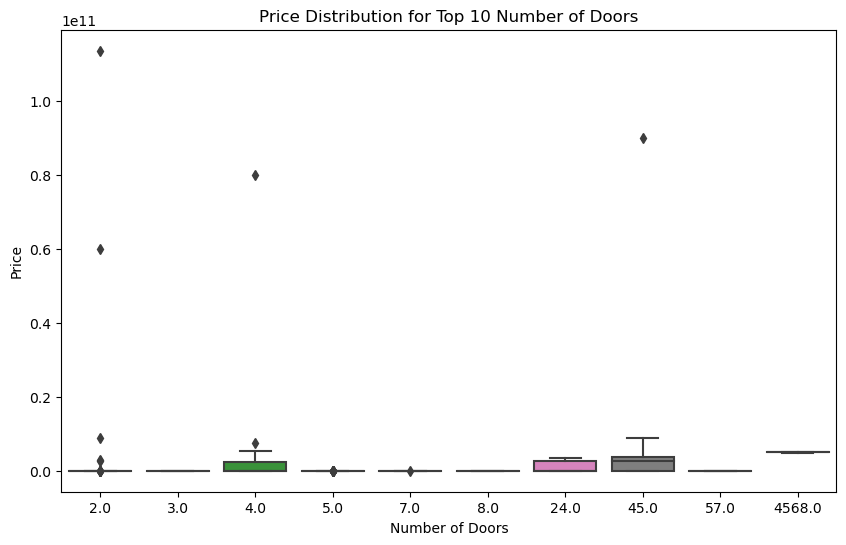

In [16]:
plt.figure(figsize=(10, 6))
top_10_number_of_doors = df['Number of Doors'].value_counts().nlargest(10).index
df_top_10_doors = df[df['Number of Doors'].isin(top_10_number_of_doors)]
sns.boxplot(x='Number of Doors', y='Price', data=df_top_10_doors)
plt.title('Price Distribution for Top 10 Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Price')
plt.show()

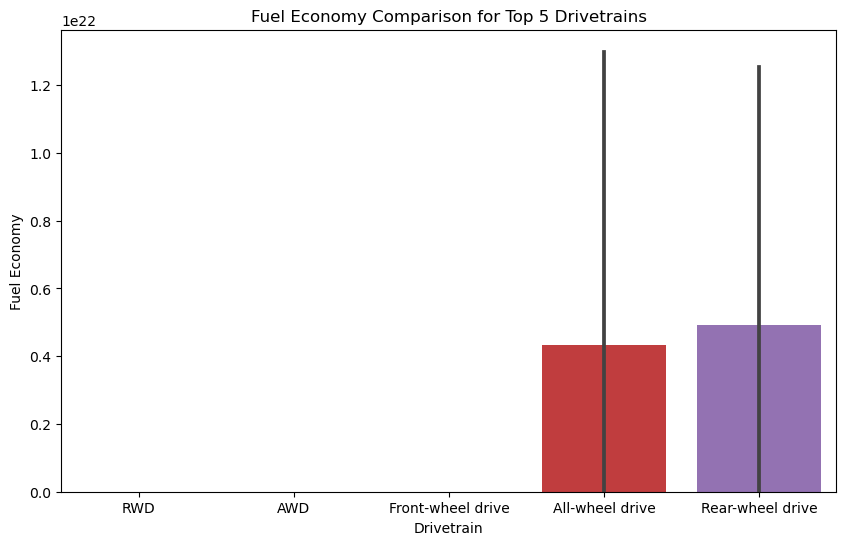

In [17]:
plt.figure(figsize=(10, 6))
top_5_drivetrains = df['Drivetrain'].value_counts().nlargest(5).index
df_top_5_drivetrains = df[df['Drivetrain'].isin(top_5_drivetrains)]
sns.barplot(x='Drivetrain', y='Fuel Economy', data=df_top_5_drivetrains)
plt.title('Fuel Economy Comparison for Top 5 Drivetrains')
plt.xlabel('Drivetrain')
plt.ylabel('Fuel Economy')
plt.show()